In [1]:
import pickle
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import xmltodict # ler xml
from tensorflow import keras
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
IMG_SIZE = 100

DatadirImg = "./cats-and-dogs-breeds-classification-oxford-dataset/images"
DatadirXml = "./cats-and-dogs-breeds-classification-oxford-dataset/annotations/xmls/"
i = 0
x = []
y = []
for imgname in os.listdir(DatadirImg):
    try:
        print(imgname)
        img = cv2.imread(os.path.join(DatadirImg,imgname), cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert imagem de BGR para RGB
        #print(img)

        xmlfile = DatadirXml + imgname.replace("jpg","xml")
        xml = xmltodict.parse( open( xmlfile , 'rb' ))
        #print(xml)
        #print("##")
        #print(xml['annotation'])
        #print("##")
        #print(xml['annotation']['size'])
        xml_size = xml['annotation']['size']
        #print("##")
        #print(xml['annotation']['object']['bndbox'])
        xml_boundbox = xml['annotation']['object']['bndbox']

       
        # Create a Rectangle patch
                                #(lower left) widht and height
        wdprop = (int(xml_size['width'])/IMG_SIZE) #proporcao da imagem W
        hgprop = (int(xml_size['height'])/IMG_SIZE) #proporcao da imagem H
          #AMOSTRAR A IMAEM
         #fig,ax = plt.subplots()
        #ax.imshow(img)
        # rect = patches.Rectangle(((int(xml_boundbox['xmin'])/ wdprop),(int(xml_boundbox['ymin'])/ hgprop)),((int(xml_boundbox['xmax'])-int(xml_boundbox['xmin'])) / wdprop ),((int(xml_boundbox['ymax'])-int(xml_boundbox['ymin'])) / hgprop ),linewidth=2,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
       # ax.add_patch(rect)
       # plt.show()
       # plt.imshow(img)
       # plt.show()
        x_img = np.array(img)/255.0
        #pegar a classe
        p=0
        imgname = imgname.replace(".jpg","")
        imgname = imgname.split("_")

        if len(imgname) == 2:
            imgname = imgname[0]
        else:
            imgname = imgname[0]+"_"+imgname[1]

        y_annot = [xml['annotation']['object']['name'],imgname,[int(xml_boundbox['xmin'])/ wdprop,int(xml_boundbox['ymin'])/ hgprop,int(xml_boundbox['xmax'])/ wdprop,int(xml_boundbox['ymax'])/ hgprop]] 
        #print(x_img)
        print(y_annot)
        x.append(x_img)
        y.append(y_annot)
        i+=1
        if(i>1500):
            break
    except Exception as e:
        pass
    

pug_185.jpg
['dog', 'pug', [25.666666666666668, 16.88888888888889, 80.33333333333333, 78.22222222222223]]
beagle_31.jpg
British_Shorthair_108.jpg
['cat', 'British_Shorthair', [29.72972972972973, 6.6, 71.77177177177177, 35.8]]
Abyssinian_125.jpg
['cat', 'Abyssinian', [43.0, 6.406685236768802, 78.6, 49.02506963788301]]
beagle_125.jpg
['dog', 'beagle', [31.0, 37.53753753753754, 51.2, 67.86786786786787]]
havanese_51.jpg
beagle_108.jpg
['dog', 'beagle', [13.513513513513514, 16.2, 84.08408408408408, 51.4]]
pomeranian_67.jpg
basset_hound_126.jpg
['dog', 'basset_hound', [36.2, 12.612612612612612, 77.8, 66.06606606606607]]
pug_154.jpg
['dog', 'pug', [33.666666666666664, 5.777777777777778, 81.0, 69.33333333333333]]
Abyssinian_138.jpg
['cat', 'Abyssinian', [50.0, 18.01801801801802, 75.6, 55.85585585585586]]
Maine_Coon_52.jpg
havanese_62.jpg
yorkshire_terrier_180.jpg
['dog', 'yorkshire_terrier', [26.933333333333334, 20.4, 86.93333333333334, 46.2]]
leonberger_39.jpg
beagle_204.jpg
Birman_13.jpg
['c

shiba_inu_6.jpg
chihuahua_80.jpg
saint_bernard_182.jpg
['dog', 'saint_bernard', [15.6, 38.4, 31.6, 60.53333333333333]]
american_bulldog_57.jpg
Bombay_158.jpg
['cat', 'Bombay', [40.6, 6.263048016701461, 85.0, 53.65344467640919]]
British_Shorthair_212.jpg
Bengal_163.jpg
['cat', 'Bengal', [51.333333333333336, 22.22222222222222, 72.0, 49.77777777777778]]
Abyssinian_114.jpg
['cat', 'Abyssinian', [34.6875, 15.130023640661937, 54.84375, 43.73522458628841]]
scottish_terrier_79.jpg
american_pit_bull_terrier_118.jpg
['dog', 'american_pit', [24.333333333333332, 17.08542713567839, 72.66666666666667, 71.85929648241206]]
Egyptian_Mau_118.jpg
['cat', 'Egyptian_Mau', [20.0, 1.7777777777777777, 68.88888888888889, 51.111111111111114]]
Sphynx_153.jpg
['cat', 'Sphynx', [40.36144578313253, 18.8, 72.59036144578313, 47.0]]
newfoundland_147.jpg
['dog', 'newfoundland', [17.6, 11.077844311377246, 74.0, 88.32335329341318]]
english_cocker_spaniel_176.jpg
['dog', 'english_cocker', [6.0, 3.5623409669211195, 47.0, 4

['dog', 'great_pyrenees', [12.4, 9.18580375782881, 47.6, 53.65344467640919]]
japanese_chin_41.jpg
chihuahua_99.jpg
Bengal_60.jpg
Birman_129.jpg
['cat', 'Birman', [37.0, 22.4, 63.0, 62.93333333333333]]
Bengal_115.jpg
['cat', 'Bengal', [43.84384384384384, 3.2, 85.28528528528528, 30.6]]
Ragdoll_62.jpg
miniature_pinscher_132.jpg
['dog', 'miniature_pinscher', [28.0, 7.5, 56.0, 76.5]]
Birman_162.jpg
['cat', 'Birman', [13.47305389221557, 9.8, 76.64670658682635, 45.4]]
Maine_Coon_151.jpg
['cat', 'Maine_Coon', [22.816901408450704, 25.4, 66.7605633802817, 57.2]]
japanese_chin_193.jpg
newfoundland_114.jpg
['dog', 'newfoundland', [34.4, 36.8, 78.0, 93.6]]
Abyssinian_195.jpg
['cat', 'Abyssinian', [4.519774011299435, 2.0, 66.10169491525424, 40.333333333333336]]
pomeranian_109.jpg
['dog', 'pomeranian', [40.0, 22.590361445783135, 59.0, 51.807228915662655]]
Bombay_87.jpg
boxer_107.jpg
['dog', 'boxer', [0.23980815347721823, 3.0, 94.7242206235012, 83.4]]
samoyed_19.jpg
Maine_Coon_139.jpg
['cat', 'Maine_C

['cat', 'Abyssinian', [19.5, 3.0, 76.25, 65.25]]
shiba_inu_144.jpg
['dog', 'shiba_inu', [40.119760479041915, 29.8, 70.35928143712574, 52.8]]
Abyssinian_166.jpg
['cat', 'Abyssinian', [9.333333333333334, 3.587443946188341, 33.666666666666664, 39.91031390134529]]
Birman_134.jpg
['cat', 'Birman', [27.466666666666665, 47.6, 71.2, 85.0]]
beagle_39.jpg
basset_hound_31.jpg
american_bulldog_89.jpg
pomeranian_38.jpg
samoyed_149.jpg
['dog', 'samoyed', [46.8, 33.06666666666667, 62.4, 63.2]]
boxer_111.jpg
['dog', 'boxer', [23.2, 0.3003003003003003, 64.2, 71.77177177177177]]
beagle_151.jpg
['dog', 'beagle', [2.2, 6.4171122994652405, 78.8, 87.16577540106951]]
leonberger_7.jpg
english_setter_23.jpg
japanese_chin_79.jpg
pug_48.jpg
miniature_pinscher_25.jpg
saint_bernard_133.jpg
['dog', 'saint_bernard', [25.6, 22.666666666666668, 70.6, 72.26666666666667]]
english_setter_184.jpg
['dog', 'english_setter', [31.0, 32.132132132132135, 67.4, 77.17717717717717]]
pug_200.jpg
newfoundland_13.jpg
['dog', 'newfoun

['dog', 'shiba_inu', [12.962962962962962, 12.4, 89.58333333333333, 74.4]]
Russian_Blue_29.jpg
havanese_43.jpg
Ragdoll_208.jpg
american_bulldog_29.jpg
Persian_166.jpg
['cat', 'Persian', [13.428571428571429, 8.6, 90.85714285714286, 63.6]]
Bengal_51.jpg
Abyssinian_109.jpg
['cat', 'Abyssinian', [28.72340425531915, 1.5555555555555556, 87.2340425531915, 32.44444444444444]]
Egyptian_Mau_30.jpg
boxer_141.jpg
['dog', 'boxer', [17.8, 15.857605177993529, 58.4, 55.663430420711975]]
Bengal_155.jpg
['cat', 'Bengal', [11.555555555555555, 22.666666666666668, 91.11111111111111, 86.33333333333333]]
american_bulldog_52.jpg
yorkshire_terrier_54.jpg
samoyed_3.jpg
havanese_182.jpg
['dog', 'havanese', [2.8, 9.375, 61.8, 63.75]]
german_shorthaired_104.jpg
['dog', 'german_shorthaired', [20.58823529411765, 9.2, 70.16806722689076, 39.8]]
samoyed_18.jpg
['dog', 'samoyed', [19.4, 5.105105105105105, 46.2, 63.06306306306306]]
english_cocker_spaniel_32.jpg
american_bulldog_205.jpg
american_bulldog_172.jpg
['dog', 'am

['dog', 'yorkshire_terrier', [20.0, 7.555555555555555, 72.0, 62.666666666666664]]
samoyed_146.jpg
['dog', 'samoyed', [13.2, 5.066666666666666, 41.0, 48.0]]
leonberger_44.jpg
keeshond_92.jpg
havanese_160.jpg
['dog', 'havanese', [33.0, 6.41399416909621, 65.6, 52.76967930029154]]
keeshond_16.jpg
['dog', 'keeshond', [47.8, 24.533333333333335, 58.0, 43.2]]
havanese_3.jpg
basset_hound_182.jpg
['dog', 'basset_hound', [3.9215686274509807, 22.8, 89.6358543417367, 84.6]]
staffordshire_bull_terrier_165.jpg
['dog', 'staffordshire_bull', [33.0, 19.466666666666665, 71.2, 62.666666666666664]]
german_shorthaired_10.jpg
['dog', 'german_shorthaired', [12.5, 12.0, 90.9375, 48.6]]
havanese_108.jpg
['dog', 'havanese', [12.0, 9.866666666666667, 57.2, 57.333333333333336]]
Persian_40.jpg
scottish_terrier_9.jpg
Abyssinian_69.jpg
american_bulldog_144.jpg
['dog', 'american_bulldog', [29.4, 11.733333333333333, 66.4, 58.93333333333333]]
Sphynx_5.jpg
Sphynx_103.jpg
['cat', 'Sphynx', [35.2, 14.67065868263473, 64.4, 

['dog', 'leonberger', [10.051546391752577, 8.6, 87.37113402061856, 71.8]]
english_setter_24.jpg
British_Shorthair_124.jpg
['cat', 'British_Shorthair', [52.8, 4.533333333333333, 80.6, 40.53333333333333]]
saint_bernard_172.jpg
['dog', 'saint_bernard', [14.4, 5.459770114942529, 86.8, 98.27586206896552]]
english_setter_61.jpg
english_cocker_spaniel_90.jpg
Egyptian_Mau_50.jpg
havanese_118.jpg
['dog', 'havanese', [24.4, 3.6036036036036037, 84.2, 91.89189189189189]]
pug_46.jpg
yorkshire_terrier_188.jpg
['dog', 'yorkshire_terrier', [18.8, 10.778443113772456, 75.6, 78.74251497005989]]
Birman_43.jpg
scottish_terrier_139.jpg
['dog', 'scottish_terrier', [39.4, 0.2777777777777778, 94.8, 80.83333333333333]]
Abyssinian_185.jpg
['cat', 'Abyssinian', [7.0, 0.4444444444444444, 63.666666666666664, 79.11111111111111]]
staffordshire_bull_terrier_16.jpg
['dog', 'staffordshire_bull', [3.0, 4.25, 96.6, 93.0]]
beagle_80.jpg
Egyptian_Mau_51.jpg
newfoundland_44.jpg
pomeranian_16.jpg
['dog', 'pomeranian', [30.2, 

['dog', 'pug', [37.634408602150536, 12.333333333333334, 82.43727598566308, 46.0]]
Abyssinian_204.jpg
pomeranian_108.jpg
['dog', 'pomeranian', [33.6, 4.8, 65.2, 61.6]]
keeshond_76.jpg
Egyptian_Mau_151.jpg
['cat', 'Egyptian_Mau', [58.22222222222222, 7.453416149068323, 84.0, 32.50517598343685]]
boxer_115.jpg
['dog', 'boxer', [25.4, 17.6, 78.2, 79.2]]
Maine_Coon_72.jpg
Egyptian_Mau_43.jpg
yorkshire_terrier_6.jpg
chihuahua_160.jpg
['dog', 'chihuahua', [7.111111111111111, 8.666666666666666, 81.33333333333333, 53.333333333333336]]
american_bulldog_168.jpg
['dog', 'american_bulldog', [3.0, 30.933333333333334, 61.8, 75.2]]
saint_bernard_161.jpg
['dog', 'saint_bernard', [28.8, 39.4, 68.26666666666667, 71.8]]
japanese_chin_196.jpg
scottish_terrier_13.jpg
['dog', 'scottish_terrier', [19.7215777262181, 1.0, 75.1740139211137, 75.4]]
english_setter_59.jpg
great_pyrenees_61.jpg
great_pyrenees_198.jpg
havanese_36.jpg
wheaten_terrier_175.jpg
['dog', 'wheaten_terrier', [10.2, 1.8181818181818183, 73.0, 75

shiba_inu_85.jpg
Bombay_68.jpg
american_pit_bull_terrier_129.jpg
['dog', 'american_pit', [31.30841121495327, 6.333333333333333, 78.03738317757009, 32.333333333333336]]
english_cocker_spaniel_156.jpg
['dog', 'english_cocker', [41.4, 15.466666666666667, 65.4, 44.8]]
Maine_Coon_219.jpg
['cat', 'Maine_Coon', [26.333333333333332, 2.5423728813559325, 47.666666666666664, 36.016949152542374]]
Sphynx_41.jpg
wheaten_terrier_80.jpg
Bombay_79.jpg
Abyssinian_136.jpg
['cat', 'Abyssinian', [31.53153153153153, 7.6, 68.16816816816817, 31.4]]
Russian_Blue_81.jpg
newfoundland_153.jpg
['dog', 'newfoundland', [20.6, 9.00900900900901, 72.4, 85.28528528528528]]
pomeranian_189.jpg
['dog', 'pomeranian', [32.333333333333336, 9.333333333333334, 57.666666666666664, 45.333333333333336]]
leonberger_94.jpg
wheaten_terrier_112.jpg
['dog', 'wheaten_terrier', [37.2, 21.333333333333332, 70.4, 70.93333333333334]]
saint_bernard_86.jpg
shiba_inu_49.jpg
american_pit_bull_terrier_127.jpg
['dog', 'american_pit', [39.666666666

english_setter_174.jpg
['dog', 'english_setter', [48.4, 3.303303303303303, 75.4, 32.732732732732735]]
Maine_Coon_241.jpg
Ragdoll_159.jpg
['cat', 'Ragdoll', [23.0, 1.1820330969267139, 48.0, 33.33333333333333]]
Russian_Blue_104.jpg
['cat', 'Russian_Blue', [55.6, 26.133333333333333, 71.0, 48.53333333333333]]
Sphynx_3.jpg
scottish_terrier_185.jpg
['dog', 'scottish_terrier', [10.2, 0.23094688221709006, 77.8, 82.67898383371825]]
Bombay_85.jpg
Birman_86.jpg
newfoundland_24.jpg
Birman_200.jpg
yorkshire_terrier_38.jpg
staffordshire_bull_terrier_66.jpg
Bombay_34.jpg
beagle_59.jpg
american_pit_bull_terrier_54.jpg
keeshond_138.jpg
['dog', 'keeshond', [9.6, 5.066666666666666, 45.4, 31.466666666666665]]
miniature_pinscher_71.jpg
boxer_155.jpg
['dog', 'boxer', [0.8, 0.3003003003003003, 61.4, 80.18018018018017]]
miniature_pinscher_145.jpg
['dog', 'miniature_pinscher', [31.0, 22.27272727272727, 96.0, 85.45454545454545]]
wheaten_terrier_51.jpg
havanese_75.jpg
Birman_138.jpg
['cat', 'Birman', [11.4457831

['dog', 'miniature_pinscher', [21.4, 14.933333333333334, 91.0, 82.13333333333334]]
miniature_pinscher_198.jpg
Persian_118.jpg
['cat', 'Persian', [35.2, 10.30701754385965, 81.8, 58.55263157894737]]
wheaten_terrier_106.jpg
['dog', 'wheaten_terrier', [25.225225225225223, 8.0, 93.993993993994, 52.4]]
newfoundland_8.jpg
miniature_pinscher_60.jpg
Persian_150.jpg
['cat', 'Persian', [35.43543543543544, 15.2, 80.78078078078077, 45.8]]
basset_hound_72.jpg
basset_hound_92.jpg
wheaten_terrier_134.jpg
['dog', 'wheaten_terrier', [26.2, 5.333333333333333, 71.2, 65.86666666666666]]
boxer_151.jpg
['dog', 'boxer', [37.6, 13.213213213213212, 73.4, 77.77777777777777]]
Russian_Blue_49.jpg
samoyed_162.jpg
['dog', 'samoyed', [46.8, 16.816816816816818, 62.0, 45.645645645645644]]
Russian_Blue_198.jpg
['cat', 'Russian_Blue', [39.8, 10.21021021021021, 75.8, 66.96696696696696]]
english_setter_139.jpg
['dog', 'english_setter', [50.0, 27.47875354107649, 71.0, 51.274787535410766]]
english_setter_55.jpg
newfoundland_

['dog', 'pomeranian', [47.601476014760145, 4.0, 82.65682656826569, 39.666666666666664]]
Birman_185.jpg
['cat', 'Birman', [45.0, 14.970059880239521, 85.6, 73.05389221556887]]
yorkshire_terrier_86.jpg
boxer_142.jpg
['dog', 'boxer', [33.0, 30.4, 68.6, 68.8]]
leonberger_57.jpg
american_bulldog_169.jpg
['dog', 'american_bulldog', [7.8, 25.825825825825824, 84.0, 97.5975975975976]]
american_bulldog_207.jpg
boxer_144.jpg
['dog', 'boxer', [24.2, 14.4, 47.0, 38.93333333333333]]
saint_bernard_73.jpg
boxer_119.jpg
['dog', 'boxer', [42.2, 39.33933933933934, 55.2, 58.55855855855856]]
english_setter_51.jpg
newfoundland_192.jpg
scottish_terrier_19.jpg
english_setter_138.jpg
['dog', 'english_setter', [30.4, 14.666666666666666, 51.4, 38.13333333333333]]
beagle_9.jpg
newfoundland_41.jpg
Russian_Blue_169.jpg
['cat', 'Russian_Blue', [25.8, 11.377245508982037, 48.6, 54.49101796407186]]
pomeranian_62.jpg
pug_74.jpg
keeshond_52.jpg
leonberger_111.jpg
['dog', 'leonberger', [31.8, 11.733333333333333, 70.4, 57.8

Maine_Coon_69.jpg
basset_hound_132.jpg
['dog', 'basset_hound', [2.4, 0.2, 87.73333333333333, 89.8]]
american_pit_bull_terrier_60.jpg
Ragdoll_129.jpg
['cat', 'Ragdoll', [17.01492537313433, 22.6, 61.7910447761194, 53.8]]
British_Shorthair_95.jpg
pug_166.jpg
['dog', 'pug', [9.777777777777779, 12.333333333333334, 89.33333333333333, 73.33333333333333]]
Bombay_105.jpg
['cat', 'Bombay', [34.93333333333333, 6.024096385542168, 68.8, 59.23694779116465]]
american_bulldog_3.jpg
newfoundland_112.jpg
['dog', 'newfoundland', [10.224948875255624, 15.0, 83.84458077709613, 88.0]]
saint_bernard_54.jpg
american_pit_bull_terrier_166.jpg
['dog', 'american_pit', [27.0, 23.11111111111111, 61.0, 72.44444444444444]]
miniature_pinscher_129.jpg
['dog', 'miniature_pinscher', [46.0, 28.88888888888889, 61.333333333333336, 57.77777777777778]]
scottish_terrier_162.jpg
['dog', 'scottish_terrier', [32.0, 4.0, 63.8, 32.0]]
leonberger_104.jpg
['dog', 'leonberger', [45.2, 20.217391304347828, 70.8, 46.95652173913044]]
chihu

pug_52.jpg
pug_36.jpg
newfoundland_61.jpg
newfoundland_87.jpg
beagle_172.jpg
['dog', 'beagle', [38.2, 14.4, 78.0, 68.53333333333333]]
yorkshire_terrier_198.jpg
keeshond_55.jpg
Persian_19.jpg
['cat', 'Persian', [0.26666666666666666, 13.4, 69.33333333333333, 64.6]]
german_shorthaired_145.jpg
['dog', 'german_shorthaired', [18.208955223880597, 16.2, 64.77611940298507, 39.4]]
english_cocker_spaniel_194.jpg
keeshond_7.jpg
pomeranian_162.jpg
['dog', 'pomeranian', [8.558558558558557, 10.666666666666666, 55.4054054054054, 43.0]]
Sphynx_232.jpg
Bombay_25.jpg
pomeranian_152.jpg
['dog', 'pomeranian', [37.666666666666664, 8.0, 76.66666666666667, 52.0]]
keeshond_120.jpg
['dog', 'keeshond', [33.8, 1.5015015015015014, 69.2, 71.47147147147147]]
staffordshire_bull_terrier_156.jpg
['dog', 'staffordshire_bull', [29.8, 28.0, 64.4, 65.6]]
american_bulldog_42.jpg
keeshond_112.jpg
['dog', 'keeshond', [53.2, 7.466666666666667, 77.4, 45.6]]
wheaten_terrier_151.jpg
['dog', 'wheaten_terrier', [19.733333333333334,

['dog', 'english_cocker', [19.6, 14.714714714714715, 69.0, 85.88588588588588]]
Bombay_161.jpg
['cat', 'Bombay', [37.4, 0.26666666666666666, 76.0, 57.06666666666667]]
basset_hound_170.jpg
['dog', 'basset_hound', [18.8, 14.114114114114114, 59.2, 96.3963963963964]]
wheaten_terrier_95.jpg
german_shorthaired_48.jpg
american_pit_bull_terrier_49.jpg
Sphynx_170.jpg
['cat', 'Sphynx', [26.4, 8.108108108108109, 59.6, 60.06006006006006]]
Persian_115.jpg
['cat', 'Persian', [56.2, 19.733333333333334, 78.8, 50.13333333333333]]
Siamese_172.jpg
['cat', 'Siamese', [42.2, 8.266666666666667, 75.0, 55.46666666666667]]
Ragdoll_105.jpg
['cat', 'Ragdoll', [37.8, 15.443037974683543, 83.6, 74.68354430379746]]
Maine_Coon_157.jpg
['cat', 'Maine_Coon', [33.633633633633636, 0.2, 70.57057057057057, 27.6]]
english_setter_157.jpg
['dog', 'english_setter', [37.2, 18.13186813186813, 80.4, 89.01098901098901]]
Birman_119.jpg
['cat', 'Birman', [30.4, 21.333333333333332, 67.6, 65.6]]
Egyptian_Mau_49.jpg
samoyed_101.jpg
['do

['dog', 'american_pit', [30.666666666666668, 11.555555555555555, 74.66666666666667, 70.66666666666667]]
keeshond_163.jpg
['dog', 'keeshond', [21.802325581395348, 6.2, 96.22093023255815, 86.8]]
english_setter_165.jpg
['dog', 'english_setter', [22.8, 24.8, 41.0, 52.0]]
miniature_pinscher_36.jpg
keeshond_65.jpg
great_pyrenees_125.jpg
['dog', 'great_pyrenees', [42.34234234234234, 8.0, 76.57657657657657, 30.0]]
Russian_Blue_193.jpg
['cat', 'Russian_Blue', [35.2, 16.0, 66.13333333333334, 41.8]]
Birman_105.jpg
['cat', 'Birman', [44.4, 12.312312312312311, 69.2, 51.35135135135135]]
american_bulldog_198.jpg
['dog', 'american_bulldog', [31.8, 3.2544378698224854, 78.0, 54.73372781065089]]
Siamese_23.jpg
scottish_terrier_194.jpg
Ragdoll_142.jpg
['cat', 'Ragdoll', [17.8, 9.237875288683602, 81.4, 79.21478060046189]]
german_shorthaired_3.jpg
pomeranian_118.jpg
['dog', 'pomeranian', [26.666666666666668, 22.18045112781955, 49.666666666666664, 60.150375939849624]]
newfoundland_45.jpg
Bombay_163.jpg
['cat

american_bulldog_224.jpg
american_pit_bull_terrier_169.jpg
['dog', 'american_pit', [32.666666666666664, 3.5555555555555554, 77.0, 54.22222222222222]]
Sphynx_156.jpg
['cat', 'Sphynx', [63.6, 17.41741741741742, 96.6, 66.66666666666667]]
havanese_24.jpg
Bombay_100.jpg
['cat', 'Bombay', [9.666666666666666, 2.1126760563380285, 81.66666666666667, 73.59154929577466]]
beagle_171.jpg
['dog', 'beagle', [22.2, 1.0666666666666667, 69.6, 67.46666666666667]]
yorkshire_terrier_193.jpg
Bengal_158.jpg
['cat', 'Bengal', [36.333333333333336, 3.111111111111111, 50.333333333333336, 25.333333333333332]]
havanese_154.jpg
['dog', 'havanese', [8.8, 15.938303341902314, 46.2, 50.89974293059126]]
basset_hound_18.jpg
['dog', 'basset_hound', [30.2, 5.866666666666666, 70.2, 60.8]]
yorkshire_terrier_22.jpg
english_setter_74.jpg
american_pit_bull_terrier_37.jpg
havanese_101.jpg
['dog', 'havanese', [12.612612612612612, 13.2, 100.0, 57.8]]
pomeranian_60.jpg
Sphynx_75.jpg
chihuahua_150.jpg
['dog', 'chihuahua', [37.979094

['cat', 'British_Shorthair', [20.0, 2.4, 62.6, 58.93333333333333]]
basset_hound_148.jpg
['dog', 'basset_hound', [39.4, 35.0, 75.2, 100.0]]
Birman_7.jpg
german_shorthaired_88.jpg
Persian_89.jpg
american_bulldog_14.jpg
['dog', 'american_bulldog', [18.4, 5.851063829787234, 73.8, 91.22340425531915]]
great_pyrenees_155.jpg
['dog', 'great_pyrenees', [43.2, 30.63063063063063, 65.6, 65.16516516516516]]
miniature_pinscher_184.jpg
['dog', 'miniature_pinscher', [40.333333333333336, 1.3333333333333333, 69.33333333333333, 64.44444444444444]]
pug_110.jpg
['dog', 'pug', [17.83625730994152, 7.8, 95.90643274853801, 55.2]]
samoyed_50.jpg
saint_bernard_142.jpg
['dog', 'saint_bernard', [19.6, 45.06666666666667, 60.0, 95.46666666666667]]
beagle_192.jpg
['dog', 'beagle', [31.6, 20.35928143712575, 74.6, 67.66467065868264]]
British_Shorthair_117.jpg
['cat', 'British_Shorthair', [35.6, 28.533333333333335, 58.8, 59.46666666666667]]
shiba_inu_87.jpg
pomeranian_160.jpg
['dog', 'pomeranian', [26.666666666666668, 1

['dog', 'german_shorthaired', [53.8, 45.283018867924525, 66.8, 62.80323450134771]]
havanese_71.jpg
Russian_Blue_236.jpg
great_pyrenees_38.jpg
saint_bernard_189.jpg
['dog', 'saint_bernard', [29.12912912912913, 21.8, 73.57357357357357, 46.6]]
chihuahua_135.jpg
['dog', 'chihuahua', [11.688311688311687, 1.0, 75.97402597402598, 64.0]]
leonberger_106.jpg
['dog', 'leonberger', [5.105105105105105, 21.4, 95.7957957957958, 75.6]]
beagle_34.jpg
samoyed_12.jpg
['dog', 'samoyed', [28.8, 9.6, 63.733333333333334, 44.2]]
Ragdoll_145.jpg
['cat', 'Ragdoll', [54.6875, 17.370892018779344, 68.4375, 39.43661971830986]]
Sphynx_252.jpg
Sphynx_184.jpg
['cat', 'Sphynx', [63.12849162011173, 43.0, 99.16201117318435, 70.8]]
boxer_128.jpg
['dog', 'boxer', [17.4, 61.56156156156156, 34.8, 93.3933933933934]]
Maine_Coon_128.jpg
['cat', 'Maine_Coon', [31.2, 13.2, 61.333333333333336, 39.0]]
shiba_inu_80.jpg
saint_bernard_66.jpg
Egyptian_Mau_199.jpg
newfoundland_98.jpg
Bengal_162.jpg
['cat', 'Bengal', [65.0, 21.7777777777

['cat', 'Sphynx', [0.3003003003003003, 0.2, 100.0, 72.8]]
havanese_122.jpg
['dog', 'havanese', [53.4, 16.6, 96.6, 56.0]]
shiba_inu_174.jpg
['dog', 'shiba_inu', [24.533333333333335, 17.6, 47.733333333333334, 37.6]]
beagle_191.jpg
['dog', 'beagle', [9.00900900900901, 39.4, 53.453453453453456, 65.6]]
Ragdoll_106.jpg
['cat', 'Ragdoll', [37.2, 9.290953545232274, 67.2, 41.56479217603912]]
miniature_pinscher_142.jpg
['dog', 'miniature_pinscher', [22.22222222222222, 19.666666666666668, 67.55555555555556, 58.333333333333336]]
Sphynx_2.jpg
english_cocker_spaniel_54.jpg
chihuahua_29.jpg
Russian_Blue_28.jpg
staffordshire_bull_terrier_200.jpg
english_cocker_spaniel_126.jpg
['dog', 'english_cocker', [26.933333333333334, 25.0, 73.06666666666666, 65.8]]
wheaten_terrier_52.jpg
Siamese_141.jpg
['cat', 'Siamese', [44.6, 0.26666666666666666, 87.2, 65.6]]
scottish_terrier_63.jpg
samoyed_30.jpg
Egyptian_Mau_27.jpg
boxer_68.jpg
Persian_56.jpg
wheaten_terrier_61.jpg
Bengal_100.jpg
['cat', 'Bengal', [36.0, 5.7

['dog', 'american_pit', [20.444444444444443, 8.333333333333334, 86.22222222222223, 56.333333333333336]]
havanese_171.jpg
['dog', 'havanese', [8.6, 15.2, 84.4, 85.86666666666666]]
Bombay_41.jpg
great_pyrenees_115.jpg
['dog', 'great_pyrenees', [44.1025641025641, 23.4, 72.82051282051282, 44.4]]
pug_157.jpg
['dog', 'pug', [9.333333333333334, 2.6217228464419478, 81.0, 82.39700374531836]]
scottish_terrier_8.jpg
great_pyrenees_105.jpg
['dog', 'great_pyrenees', [28.0, 26.666666666666668, 59.0, 65.86666666666666]]
scottish_terrier_190.jpg
['dog', 'scottish_terrier', [10.355987055016183, 1.2, 81.87702265372168, 65.6]]
american_bulldog_59.jpg
havanese_29.jpg
miniature_pinscher_88.jpg
samoyed_40.jpg
Birman_20.jpg
samoyed_61.jpg
Russian_Blue_129.jpg
['cat', 'Russian_Blue', [35.6, 12.693498452012385, 64.2, 57.89473684210526]]
British_Shorthair_144.jpg
['cat', 'British_Shorthair', [33.0, 19.2, 78.0, 79.46666666666667]]


In [3]:
#print(y)
print(np.shape(y))
y = np.array(y)
y = y[:,2:3]
print(y.shape)
print(y)


(1501, 3)
(1501, 1)
[[list([25.666666666666668, 16.88888888888889, 80.33333333333333, 78.22222222222223])]
 [list([29.72972972972973, 6.6, 71.77177177177177, 35.8])]
 [list([43.0, 6.406685236768802, 78.6, 49.02506963788301])]
 ...
 [list([10.355987055016183, 1.2, 81.87702265372168, 65.6])]
 [list([35.6, 12.693498452012385, 64.2, 57.89473684210526])]
 [list([33.0, 19.2, 78.0, 79.46666666666667])]]


In [4]:
y = y[0:,0]

In [5]:
print(y)
print(y.shape)
x = np.array(x)
x = np.reshape(x, (x.shape[0],IMG_SIZE,IMG_SIZE,3))
print(x.shape)
#print(x[4])
print(y[1])
print(y.shape)

[list([25.666666666666668, 16.88888888888889, 80.33333333333333, 78.22222222222223])
 list([29.72972972972973, 6.6, 71.77177177177177, 35.8])
 list([43.0, 6.406685236768802, 78.6, 49.02506963788301]) ...
 list([10.355987055016183, 1.2, 81.87702265372168, 65.6])
 list([35.6, 12.693498452012385, 64.2, 57.89473684210526])
 list([33.0, 19.2, 78.0, 79.46666666666667])]
(1501,)
(1501, 100, 100, 3)
[29.72972972972973, 6.6, 71.77177177177177, 35.8]
(1501,)


In [6]:
print(y.shape)
y1 = []
y2 = []
y3 = []
y4 = []
print(len(y))
q = 0
for i in y:
    y1.append(i[0])
    y2.append(i[1])
    y3.append(i[2])
    y4.append(i[3])
print(len(y1))

y1_train = y1[:1000]
y1_val = y1[1000:1501]
y2_train = y2[:1000]
y2_val = y2[1000:1501]
y3_train = y3[:1000]
y3_val = y3[1000:1501]
y4_train = y4[:1000]
y4_val = y4[1000:1501]

Y_train= [y1_train,y2_train,y3_train,y4_train]

Y_val= [y1_val,y2_val,y3_val,y4_val]

x_train = x[:1000]
x_val = x[1000:1501]

(1501,)
1501
1501


In [11]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
#from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Flatten
#input layer
visible = Input(shape=(100, 100, 3))
conv1 = Conv2D(64,kernel_size=3,activation="relu")(visible)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = Conv2D(64,kernel_size=3,activation="relu")(pool1)
conv3 = Conv2D(32,kernel_size=3,activation="relu")(conv2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv3)
flat1 = Flatten()(pool2)

class1 = Dense(128, activation="relu")(flat1)
class2 = Dense(128, activation="relu")(class1)
class3 = Dense(64, activation="relu")(class2)
output1 = Dense(1,name="output1")(class3)

class4 = Dense(128, activation="relu")(flat1)
class5 = Dense(128, activation="relu")(class4)
class6 = Dense(64, activation="relu")(class5)
output2 = Dense(1,name="output2")(class6)

class7 = Dense(128, activation="relu")(flat1)
class8 = Dense(128, activation="relu")(class7)
class9 = Dense(64, activation="relu")(class8)
output3 = Dense(1,name="output3")(class9)

class10 = Dense(128, activation="relu")(flat1)
class11 = Dense(128, activation="relu")(class10)
class12 = Dense(64, activation="relu")(class11)
output4 = Dense(1,name="output4")(class12)

model = Model(inputs=visible, outputs = [output1,output2,output3,output4])

print(model.summary())
plot_model(model, to_file='multiple_outputs.png')
losses = {
    "output1":"mean_squared_error",
    "output2":"mean_squared_error",
    "output3":"mean_squared_error",
    "output4":"mean_squared_error"
}

model.compile(loss=losses,optimizer='adam',metrics=['accuracy'])




Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 98, 98, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 49, 49, 64)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 47, 47, 64)   36928       max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [12]:
FitModel = model.fit(x_train,Y_train,validation_data=(x_val, Y_val),epochs=10,batch_size=128)

Train on 1000 samples, validate on 501 samples
Epoch 1/10
1000/1000 [==============================] - 32s 32ms/step - loss: 6084.8265 - output1_loss: 700.9814 - output2_loss: 274.3730 - output3_loss: 2969.9365 - output4_loss: 2030.5537 - output1_accuracy: 0.0030 - output2_accuracy: 0.0000e+00 - output3_accuracy: 0.0000e+00 - output4_accuracy: 0.0000e+00 - val_loss: 1369.9292 - val_output1_loss: 305.2924 - val_output2_loss: 202.5565 - val_output3_loss: 461.6169 - val_output4_loss: 399.9040 - val_output1_accuracy: 0.0060 - val_output2_accuracy: 0.0040 - val_output3_accuracy: 0.0020 - val_output4_accuracy: 0.0000e+00
Epoch 2/10
1000/1000 [==============================] - 31s 31ms/step - loss: 1771.5211 - output1_loss: 473.2629 - output2_loss: 202.7727 - output3_loss: 451.1168 - output4_loss: 633.9420 - output1_accuracy: 0.0000e+00 - output2_accuracy: 0.0080 - output3_accuracy: 0.0020 - output4_accuracy: 0.0020 - val_loss: 1424.3796 - val_output1_loss: 294.3843 - val_output2_loss: 181.32

In [13]:

accuracy = model.evaluate(x_train,Y_train)
print(model.metrics_names)
print(accuracy)

1000/1000 [==============================] - 8s 8ms/step
['loss', 'output1_loss', 'output2_loss', 'output3_loss', 'output4_loss', 'output1_accuracy', 'output2_accuracy', 'output3_accuracy', 'output4_accuracy']
[976.90054296875, 235.14459228515625, 124.44879150390625, 297.937744140625, 318.58575439453125, 0.004999999888241291, 0.004999999888241291, 0.0020000000949949026, 0.0020000000949949026]


[25.58505, 11.400242, 60.59064, 49.609135]


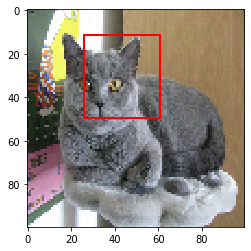

[25.564384, 11.383796, 61.025024, 49.281754]


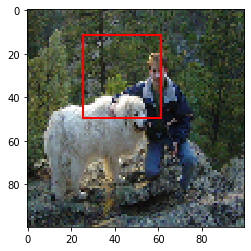

[26.928709, 12.104381, 66.071266, 52.772552]


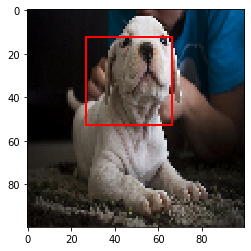

[25.977884, 11.505454, 61.719303, 49.850075]


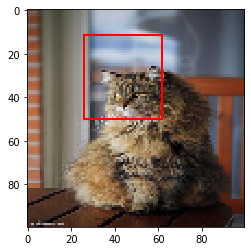

[27.083124, 12.031364, 64.81464, 52.4081]


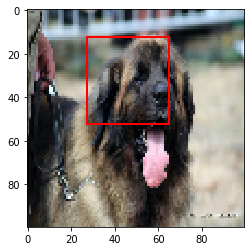

[26.308117, 11.61681, 62.55409, 50.61285]


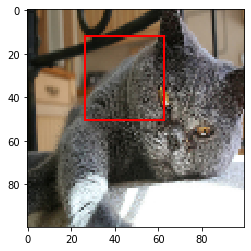

[26.61787, 11.769141, 63.21481, 51.20842]


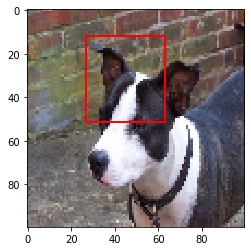

[27.080692, 12.11609, 65.27797, 52.639683]


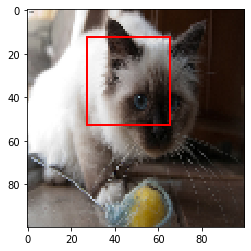

[25.67685, 11.395505, 60.67971, 49.60922]


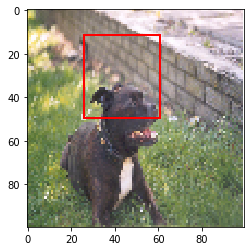

[25.519804, 11.407382, 61.683666, 49.708984]


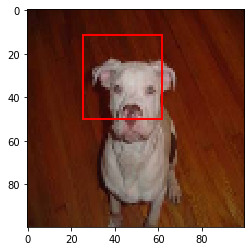

In [38]:
for i in range(10, 20):
    pred =model.predict(x[i:i+1])
    saida = [pred[0][0][0],pred[1][0][0],pred[2][0][0],pred[3][0][0]]
    print(saida)
    img = x[i]
    #AMOSTRAR A IMAEM
    fig,ax = plt.subplots()
    ax.imshow(img)
    rect = patches.Rectangle(saida,width=(saida[2]-saida[0]),height=(saida[3]-saida[1]),linewidth=2,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.show()


